In [8]:
import pandas as pd
from string import punctuation
 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
# from keras.preprocessing.image import ImageDataGenerator 
from keras.datasets import fashion_mnist 
from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
# import h5py

In [9]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [11]:
num_classes = 10
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

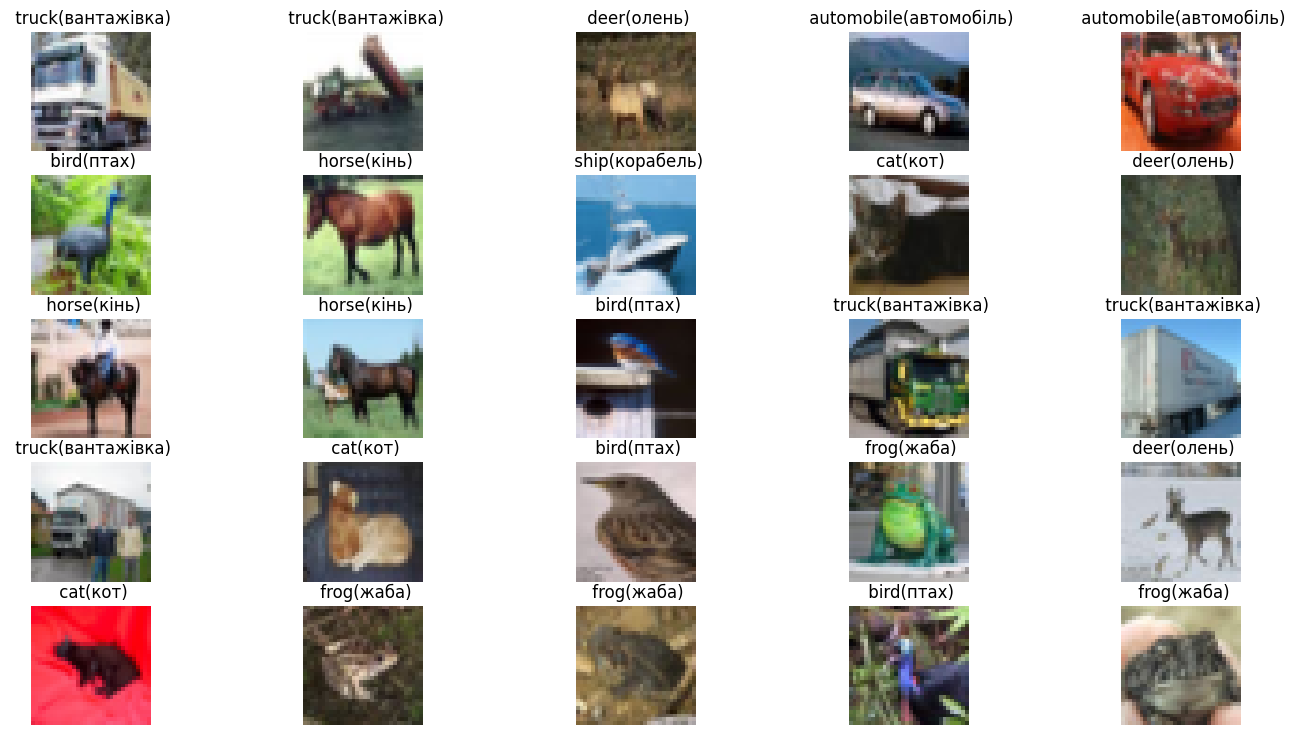

In [12]:
plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [13]:
x_train = x_train.reshape(x_train.shape[0], 32,32,3)
x_test = x_test.reshape(x_test.shape[0], 32,32,3)
input_shape = (32,32, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [14]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [15]:
 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
model = models.load_model("basesd_model_new.h5")
# model = models.load_model("cifar10_best_result1.h5")


In [ ]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

In [19]:
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step


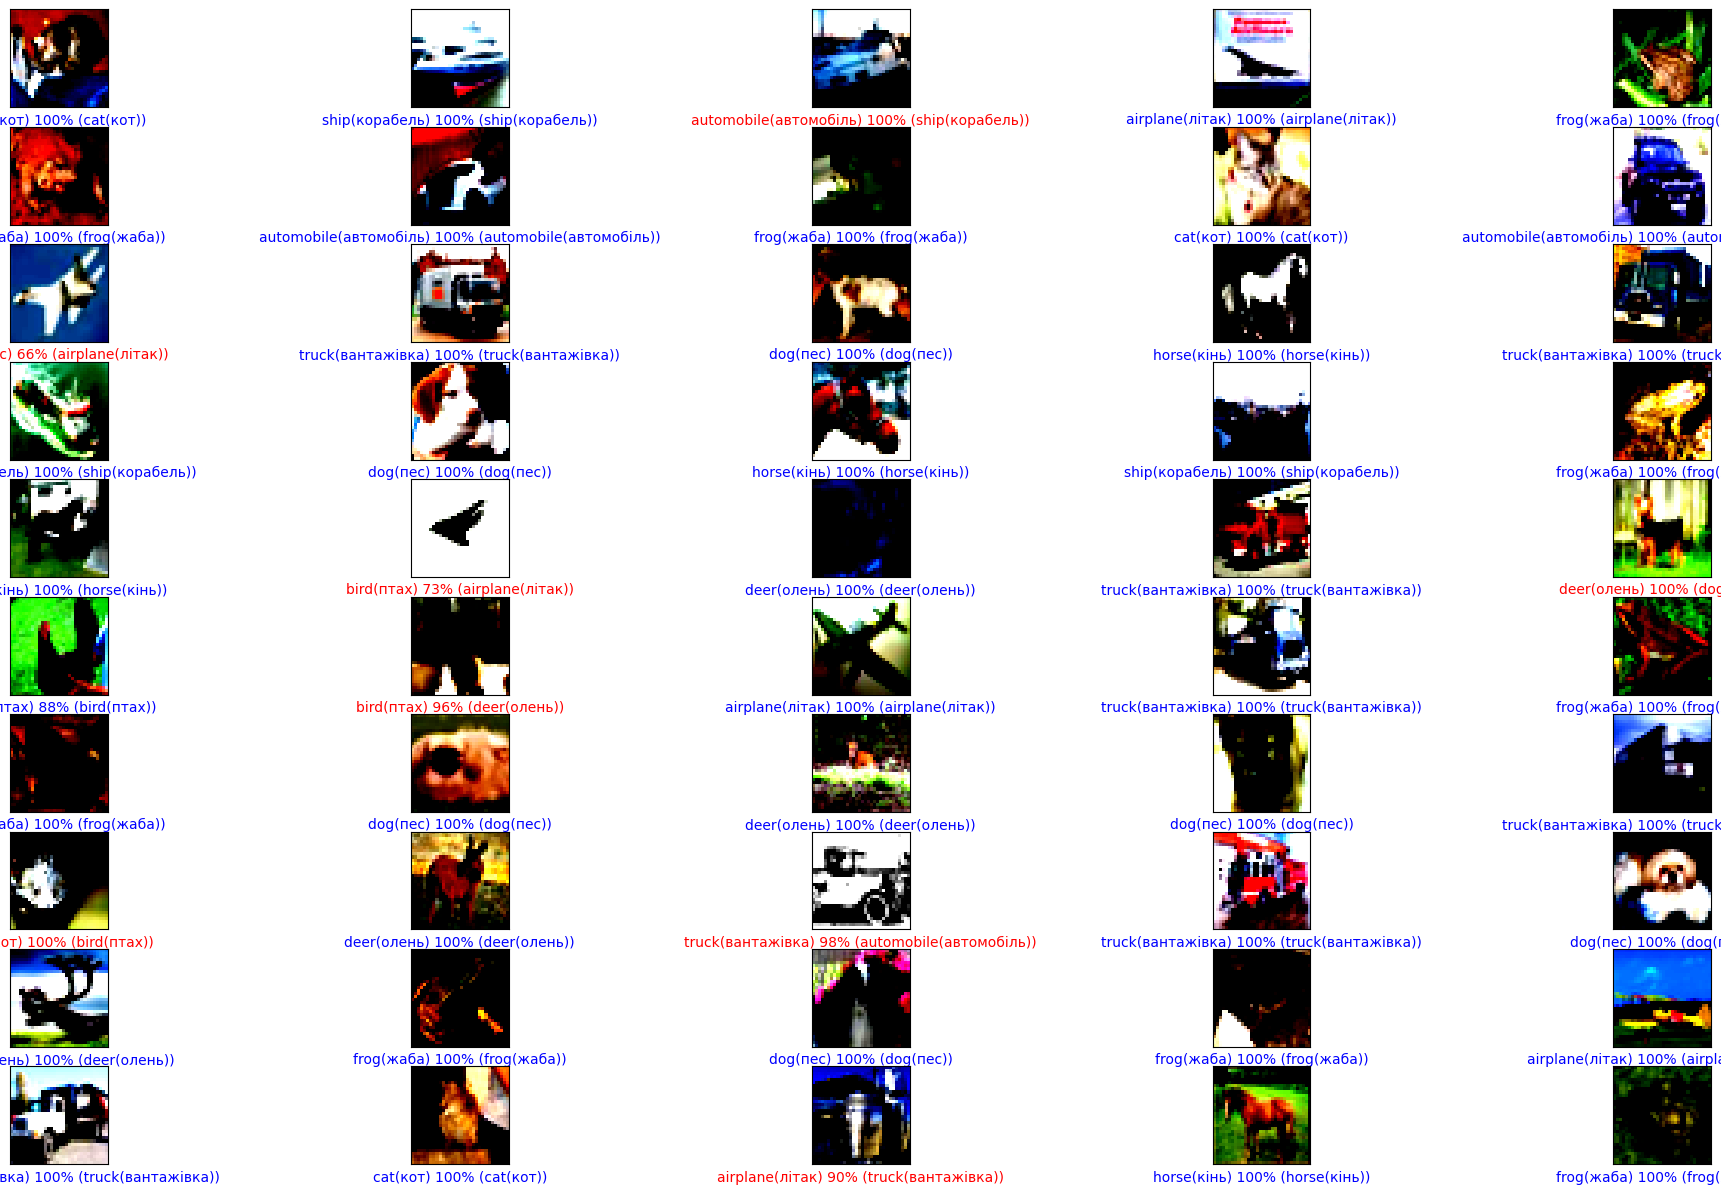

In [21]:
def plot_image(i, predictions_array, true_label, img, ):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    
 

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
         
    else:
        color = 'red'
        

    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                         100*np.max(predictions_array),
                                         classes[true_label]),
                                         color=color)
num_images = 50
num_rows = 10
num_cols = 5
sum = 0
plt.figure(figsize=(num_images/2, 15))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test[i], x_test[i],  )
   